# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue">Análise de Componentes Principais -  Avaliação</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios abaixo farão uso do conjunto de dados <font style="font-family: monaco">blobs2.csv</font> disponível no _moodle_.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercício 1)
Calcule as direções principais dos dados contidos no arquivo <font style="font-family: monaco">blobs2.csv</font>. Quais são os valores das duas maiores variâncias?

a) 338.02 e 271.17<br>
<font color='red'>b) 1162.75 e 993.63<br></font>
c) 271.17 e 160.90 <br>
d) 1074.60 e 338.02

In [37]:
# Instanciando X como um numpy array
X = pd.read_csv('blobs2.csv').values
print(X.shape)

(600, 25)


In [38]:
X

array([[ -9.5878279 ,  -4.64097383,  -7.23887567, ..., -11.30567767,
          6.45673206,  -9.10383613],
       [  4.4301998 ,  -7.40895999,   6.54222552, ...,  -6.95636658,
         -4.079177  ,  -3.33252015],
       [  1.6874882 ,  -4.74731262,   7.71443412, ...,  -7.19447141,
         -3.64190343,  -4.37896508],
       ...,
       [  3.47720972,  -5.97931622,   8.33864554, ...,  -7.52327915,
         -3.84051014,  -2.02768834],
       [  2.01035239,  -8.5735666 ,   9.0428501 , ...,  -6.93278346,
         -3.79939492,  -4.14768822],
       [  1.39710026,  -8.46053798,   6.84706245, ...,  -8.17332905,
         -4.66702902,  -4.29965094]])

In [39]:
from sklearn.decomposition import PCA
pca_obj=PCA(svd_solver='full')
X_transformed = pca_obj.fit(X)

# o atributo "components_" é um array onde as direções principais 
# estão armazenadas nas linhas, sendo a componente principal de maior 
# variância armazenada na linha 0, componente principal com a 
# segunda maior variância na linha 1 e assim por diante
print('\nDireção com maior variancia\n')
print(X_transformed.components_[0:1])


Direção com maior variancia

[[ 2.00601241e-02  2.16669637e-02 -4.34705477e-03  4.34575960e-02
   2.89909623e-02  3.29963574e-01 -1.21438054e-03  6.76290472e-02
   3.76200072e-02 -4.71462497e-03  6.13705831e-02  3.47264046e-02
   1.09838315e-02  2.33948283e-01 -2.31846516e-02 -2.26311174e-02
  -2.83629027e-01  8.54848222e-01 -2.43608277e-02  7.56648150e-02
   1.82895131e-02  1.79357086e-02 -3.23709703e-02 -4.82246541e-04
  -3.71933168e-02]]


In [40]:
# o atributo "explained_variance_" é um array com a variância explicada por cada componente selecionada (novas coordenadas)
# sendo a componente maior variância armazenada no índice 0, a componente com a segunda maior variância no índice 1
# e assim por diante
print(pca_obj.explained_variance_)

[1.16275797e+03 9.93633235e+02 9.58550832e+02 8.62611653e+02
 7.61975871e+02 2.31658739e+02 1.30336748e+02 1.27268677e+02
 1.26850842e+00 1.22231302e+00 1.20210845e+00 1.10917185e+00
 1.08936336e+00 1.06001534e+00 1.00779968e+00 9.78347600e-01
 9.66668811e-01 9.27783735e-01 8.84990473e-01 8.69905358e-01
 8.42314426e-01 7.89102415e-01 7.67901964e-01 7.17463589e-01
 6.88735223e-01]


In [41]:
pca_obj.explained_variance_[:2].round(2)

array([1162.76,  993.63])

### Exercício 2)
Qual o número mínimo de direções principais necessárias para representar $95\%$ da variância contida nos dados?

a) 5<br>
b) 6<br>
<font color='red'>c) 7<br></font>
d) 8

In [42]:
# o atributo "explained_variance_ratio_" é um array com a percentagem da explicada por cada componente selecionada
# (novas coordenadas), sendo a componente maior variância armazenada no índice 0, 
# a componente com a segunda maior variância no índice 1 e assim por diante

variance = pca_obj.explained_variance_ratio_
threshold = 0.95
soma = 0
num_componentes = 0
for i in range(variance.shape[0]):
    soma += variance[i]
    if soma >= threshold:
        num_componentes = i+1
        break
        
print('Soma obtida:', soma, '\nNúmero de direções principais:', num_componentes)


Soma obtida: 0.9726108540965198 
Número de direções principais: 7


### Exercício 3)
Existem _outliers_ nos dados originais. Utilize z-score com um threshold de 2.8 para identificar os outliers e removê-los dos dados. Quantos outliers foram identificados?

a) 3<br>
b) 4<br>
<font color='red'>c) 5<br></font>
d) 6

In [43]:
# utilizando z-score para encontrar outliers
# o pacote scipy possui um método para encontrar o z-score

from scipy.stats import zscore

# calculando z-scores
Xzscore = zscore(X,axis=0)

# encontrando outliers
outliers = np.abs(Xzscore) > 2.8 # 2.8 é o threshold utilizado para 
                                 # identificar um valor como outlier
    
outliers_id = np.argwhere(outliers == True)
print('Índice das linhas  e valores dos elementos "outliers":\n',outliers_id)

# removendo outliers
df = pd.DataFrame(data=X)
shape_original = df.shape
print("Tamanho original dos dados:", shape_original)
df = df.drop(outliers_id[:,0],axis=0)
shape_no_outliers = df.shape
print("Tamanho dos dados após remoção dos outliers:", shape_no_outliers)
print("Quantidade de exemplos removidos:", shape_original[0]-shape_no_outliers[0])

X_no_outliers = df.values

Índice das linhas  e valores dos elementos "outliers":
 [[116  13]
 [240  16]
 [286   5]
 [298  17]
 [398   6]]
Tamanho original dos dados: (600, 25)
Tamanho dos dados após remoção dos outliers: (595, 25)
Quantidade de exemplos removidos: 5


### Exercício 4)
Qual a variância representada pelas duas primeiras componentes principais após a remoção dos outliers?

a) aproximadamente 90% <br>
b) aproximadamente  97% <br>
c) aproximadamente 80% <br>
<font color='red'>d) aproximadamente 75% </font>

In [44]:
X_no_outliers = df.values  # array numpy
pca_obj2=PCA(svd_solver='full')
X_no_outliers_transformed = pca_obj2.fit(X_no_outliers)
pca_obj2.explained_variance_ratio_[0:2].sum()

0.7526760714065048

Text(0.5, 1.0, 'Sem Outliers')

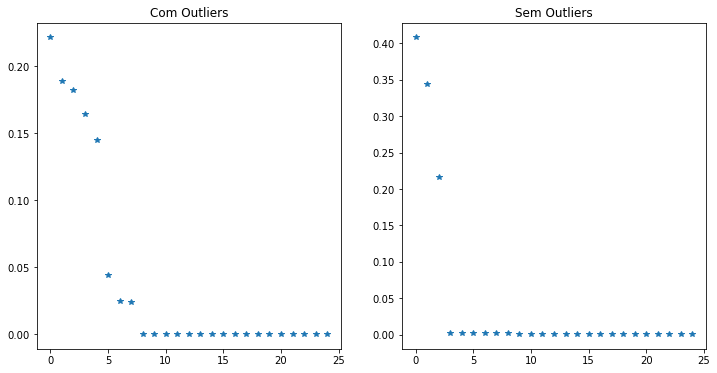

In [45]:
# Comparando visualmente o decaimento da variância
plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.plot(pca_obj.explained_variance_ratio_, '*')  # plota o decaimento das variâncias norms (explicadas) com outliers
ax1.set_title('Com Outliers')
ax2.plot(pca_obj2.explained_variance_ratio_, '*') # plota o decaimento das variâncias norms (explicadas) sem outliers
ax2.set_title('Sem Outliers')

### Exercício 5)
Projete os dados sem outliers nas duas primeiras direções principais. Quantos clusters você consegue visualizar na projeção?

a) 6<br>
b) 5<br>
<font color='red'>c) 4<br></font>
d) 3

(595, 2)


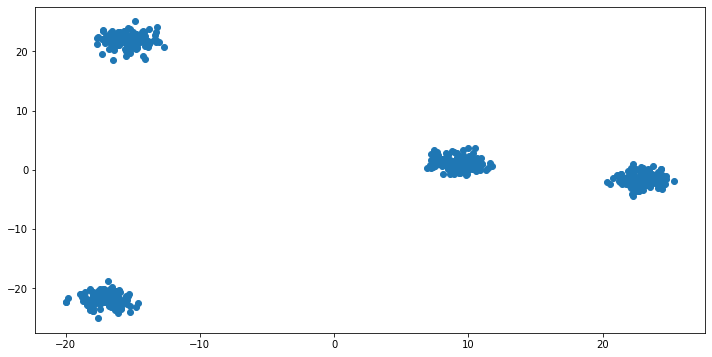

In [46]:
###########
# projecting data in 2D
###########

pca_proj2=PCA(n_components=2)
X_no_outliers_2d=pca_proj2.fit_transform(X_no_outliers)
print(X_no_outliers_2d.shape)

plt.scatter(X_no_outliers_2d[:,0],X_no_outliers_2d[:,1])